## Imports

In [1]:
import os
import re
import sys
import typing
import gc
import pandas as pd
import pickle
import logging

sys.path.append(
    os.path.join('.','src')
)

from src.models import Pipeline
from src.nodes import *

In [2]:
logging.basicConfig(filename='logs/logs.log', level=logging.DEBUG)

# Tweets Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = True)

In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
d

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline.train_model()

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = False)

In [ ]:
pipeline.load_model('models/tweets/tweets.pth')

In [ ]:
pipeline.generate(start_text = 'all', num_words = 40)

In [ ]:
pipeline.generate(start_text = 'what', num_words = 40)

In [ ]:
pipeline.generate(start_text = 'i like', num_words = 40)

# Wiki Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_WIKI.json', load_model_data = True)

In [ ]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

In [ ]:
pipeline.load_model('models/wiki103/wiki103.pth')

In [ ]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

In [ ]:
pipeline.train_model()

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline.generate(start_text = 'all', num_words=40)

In [ ]:
pipeline.generate(start_text = 'what', num_words=40)

In [ ]:
pipeline.generate(start_text = 'i like')

In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
import pickle
from src.data_processing import *

In [ ]:
a = []
for f in os.listdir('nodes_data/nodes_data_wiki103'):
    f = os.path.join('nodes_data/nodes_data_wiki103', f)
    
    with open(f, 'rb') as file:
        a.append(pickle.load(file))

In [ ]:
seq = SequenceDataset(
    federated.vocabulary,
    a[0],
    min_seq_length = 2,
    max_seq_length = 30,
    device = None
)

In [ ]:
for s in seq:
    print(sum(s))

## FedAVG

In [1]:
from src.federated_pipeline import Federated_AVG

import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [4]:
federated = Federated_AVG(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

100%|██████████| 100/100 [00:11<00:00,  8.76it/s]


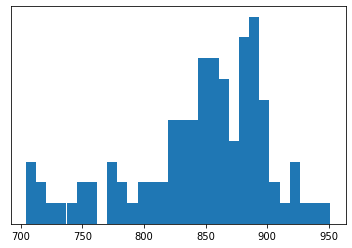

In [24]:
plt.hist([len(n.data) for n in federated.nodes.values()], bins = 30, density=True, cumulative=False, align='right')
plt.yticks([])
plt.show()

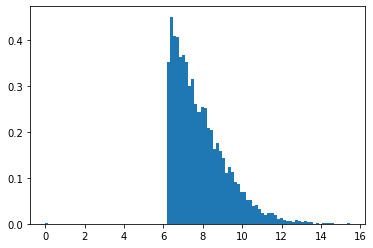

In [54]:
x = np.array(list(federated.vocabulary.vocab.values()))
x = np.log(x)
plt.hist(x, bins = 100, density=True)
plt.show()

In [57]:
for n, _ in federated.general_model.named_parameters():
    print(n)

embedding_layer.weight
rnn.weight_ih_l0
rnn.weight_hh_l0
rnn.bias_ih_l0
rnn.bias_hh_l0
rnn.weight_ih_l1
rnn.weight_hh_l1
rnn.bias_ih_l1
rnn.bias_hh_l1
linear.weight
linear.bias


In [8]:
pd.DataFrame(federated.results)

,0,1,2,3,4,5,6,7,8,9,10
perplexity,109.786,116.941,3.69556e+14,764319,6190.48,5.92698e+06,764319,6684.71,4079.73,1815.65,1567.93
loss,4.70025,4.76361,33.5265,13.5431,8.73029,15.5915,13.5431,8.80671,8.31287,7.50315,7.35653
f1_recall,0.238012,0.234265,0.012554,0.0121666,0.0110788,0.0102518,0.0121666,0.00774847,0.0376248,0.0203248,0.0413351
f3_recall,0.366637,0.360244,0.0307555,0.0279988,0.053986,0.0192594,0.0279988,0.059775,0.0619133,0.0836165,0.15193
generate,all work and no play for an individual sets in,all work and no play. He did not because,all work and no play play play a makes.,all work and no play makes a a dull and,all work and no play convincing sailed wounds ...,all work and no play play play play makes makes,all work and no play makes makes dull dull boy,all work and no play Manor continental partial...,all work and no play renamed exercised colleag...,all work and no play in in as precipitation Al...,all work and no play death ocean Cook numbers no
attack_perplexity,180.865,204.177,289.102,5.38052,58.4259,24.2049,5.38052,47.6818,25.7298,56.0435,91.072
perplexity_1,104.362,95.6604,1.63921e+14,579903,5020.43,4.52612e+06,579903,5389.15,3295.59,1494.64,1302.36
loss_1,4.63824,4.5494,32.4852,13.1439,8.49179,15.1607,13.1439,8.55767,8.07178,7.29761,7.15953
f1_recall_1,0.242661,0.242661,0.0117417,0.0176125,0.0156556,0.00782779,0.0176125,0.0117417,0.0547945,0.0273973,0.0547945
f3_recall_1,0.377691,0.39726,0.037182,0.0391389,0.072407,0.0176125,0.0391389,0.072407,0.0782779,0.109589,0.164384


## LICCHAVI

In [1]:
from src.federated_pipeline import Federated_LICCHAVI

import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_WIKI.json",
    "CONFIG_FEDERATED_WIKI.json",
    testing = True
)

100%|██████████| 10/10 [00:00<00:00, 42.18it/s]


In [3]:
federated.train(3, save_results = False)

  0%|          | 0/10 [00:00<?, ?it/s]

round 0


  0%|          | 0/10 [00:00<?, ?it/s]

round 1


  0%|          | 0/10 [00:00<?, ?it/s]

round 2


  0%|          | 0/10 [00:00<?, ?it/s]

round 3


100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


In [1]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

NameError: name 'Federated_LICCHAVI' is not defined

In [1]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_WIKI.json",
    "CONFIG_FEDERATED_WIKI.json",
    testing = True
)

NameError: name 'Federated_LICCHAVI' is not defined

  0%|          | 0/10 [00:00<?, ?it/s]

round 0


  0%|          | 0/10 [00:00<?, ?it/s]

round 1


  0%|          | 0/10 [00:00<?, ?it/s]

round 2


  0%|          | 0/10 [00:00<?, ?it/s]

round 3


  0%|          | 0/10 [00:00<?, ?it/s]

round 4


  0%|          | 0/10 [00:00<?, ?it/s]

round 5


100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


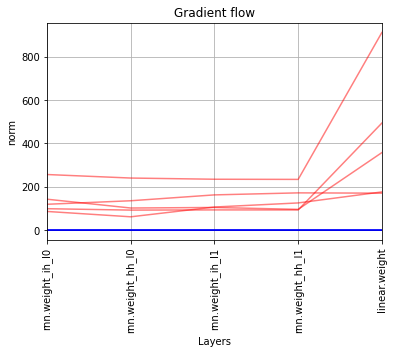

In [5]:
federated.train(5, save_results=False)